In [1]:
import numpy as np
import pylab, dashi, tables
import matplotlib.pyplot as plt
from icecube import astro
from matplotlib.font_manager import fontManager, FontProperties
import csky as cy
import json
from astropy.time import Time
import glob
import histlite as hl
import pandas as pd
import tables
from matplotlib.pyplot import figure

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# GC
GC_MC = np.load('/data/ana/PointSource/Galactic_Center/version-001-p00/IC86_2016_20878_L5_MC.npy')
# GFU
GFU_MC = np.load('/data/ana/analyses/gfu/version-002-p06/IC86_2011_MC.npy')
GC_ra , GC_dec = astro.gal_to_equa(0., 0.)
mask = ((GFU_MC['dec'])>GC_dec-np.radians(10)) & ((GFU_MC['dec'])<GC_dec+np.radians(10))
GFU_MC = GFU_MC[mask]

In [3]:
def plot_eff_area(MC_dec, MC_ow, MC_trueE, label):
    MinE = 2
    MaxE = 7
    NBins=(MaxE-MinE)*15

    ZenMin = np.min(MC_dec+np.pi/2)
    ZenMax = np.max(MC_dec+np.pi/2)

    SolidAngle=2*np.pi*(np.cos(ZenMin)-np.cos(ZenMax))
    Weight=MC_ow*1/SolidAngle*10**(-4)

    h,edges=np.histogram(np.log10(MC_trueE),weights=Weight,range=[MinE,MaxE],bins=NBins)

    lin_edges=10**edges
    widths=lin_edges[1:]-lin_edges[:-1]
    h/=widths
    centers=(edges[:-1]+edges[1:])/2

    pylab.semilogy(centers,h, label = label)

    pylab.legend(loc='upper left')
    pylab.xlabel('log(E(GeV))')
    pylab.ylabel('Effective Area (m$^2$)')
    pylab.grid()

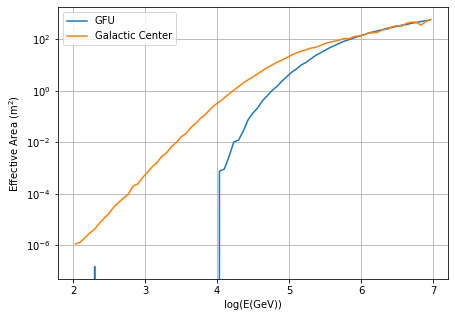

<Figure size 432x288 with 0 Axes>

In [5]:
fig = plt.figure(figsize = (7,5))
plot_eff_area(GFU_MC['dec'], GFU_MC['ow'], GFU_MC['trueE'], label = 'GFU')
plot_eff_area(GC_MC['dec'], GC_MC['ow'], GC_MC['trueE'], label = 'Galactic Center')
pylab.grid()
pylab.show()
pylab.clf()